<a href="https://colab.research.google.com/github/iamBehzad/Clustering-Mall-Customers-Dataset/blob/main/Clustering_Mall_Customers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
</div>    <h3 align="center">Clustering - Mall Customers Dataset</h3>

## Importing the libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [ ]:
print ('\n======================================= ((((( 5 First Records ))))) =======================================\n')
print(df.head())

print ('\n======================================= ((((( 5 Last Records ))))) =======================================\n')
print(df.tail())

print ('\n======================================= ((((( 5 Sample Records ))))) =======================================\n')
print(df.sample(5))

print ('\n======================================= ((((( Information of DataFrame ))))) =======================================\n')
print(df.info())

print ('\n======================================= ((((( Statistical description ))))) =======================================\n')
print(df.describe())

print ('\n======================================= ((((( Shape Of DataFrame ))))) =======================================\n')
print(df.shape)

print ('\n======================================= ((((( Columns Of DataFrame ))))) =======================================\n')
print(df.columns)

print ('\n======================================= ((((( Type Of DataFrame ))))) =======================================\n')
print(df.dtypes)

print ('\n=========================== ((((( Identifying the unique number of values in DataFrame ))))) ===========================\n')
print(df.nunique())

print ('\n======================================= ((((( groupby Gender ))))) ========================================\n')
print(df.groupby('Gender').count())

print ('\n=================================== ((((( correlation between the features ))))) ===================================\n')
corr = df.corr()
print(corr)



======================================= ((((( 5 First Records ))))) =======================================

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

======================================= ((((( 5 Last Records ))))) =======================================

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137               

## Data Preprocessing

In [ ]:
print ('\n=================================== ((((( missing values in DataFrame ))))) ===================================\n')
print(df.isnull().sum())

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

print ('\n======================================= ((((( Type Of X ))))) =======================================\n')
print('DataFrame=\n',df.dtypes)

print ('\n======================================= ((((( Head And Shape Of X ))))) =======================================\n')
print(df.head())
print(df.shape)



=================================== ((((( missing values in DataFrame ))))) ===================================

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

======================================= ((((( Type Of X ))))) =======================================

DataFrame=
 CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

======================================= ((((( Head And Shape Of X ))))) =======================================

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  1

## Strorytelling - Visualization


============================== (((((the heatmap of correlation between the features ))))) ============================


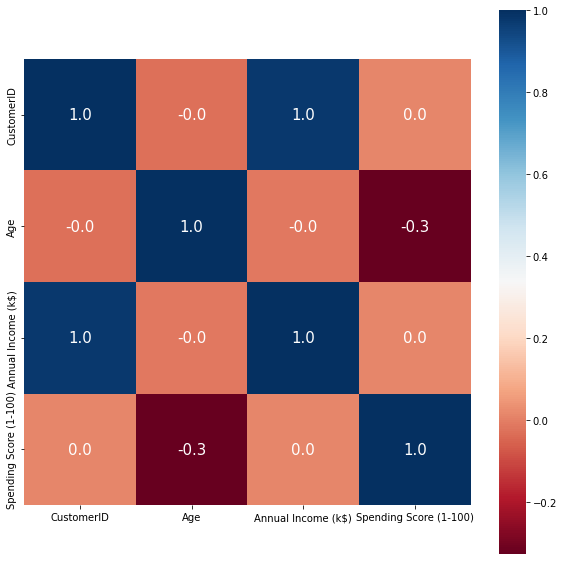

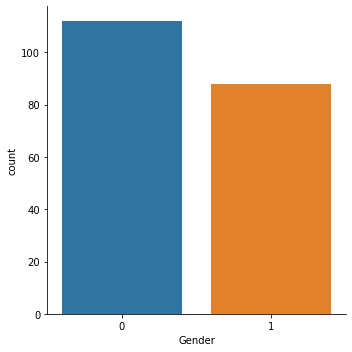

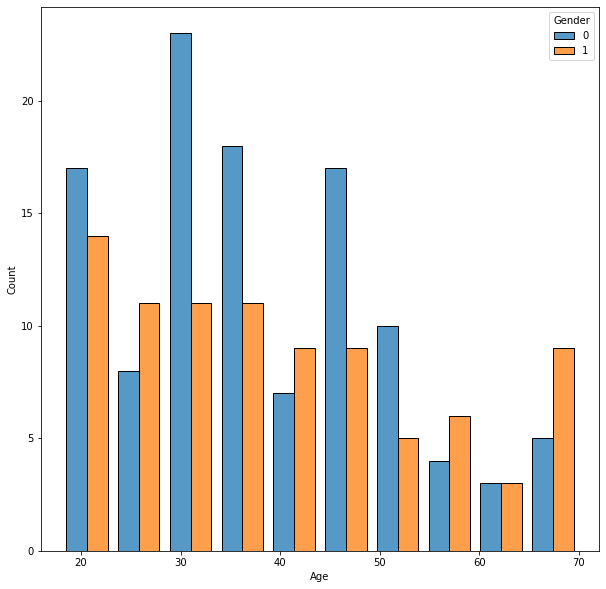

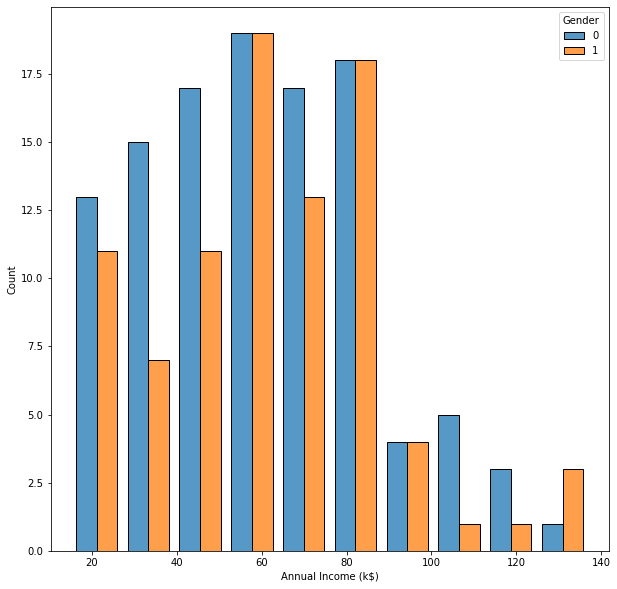

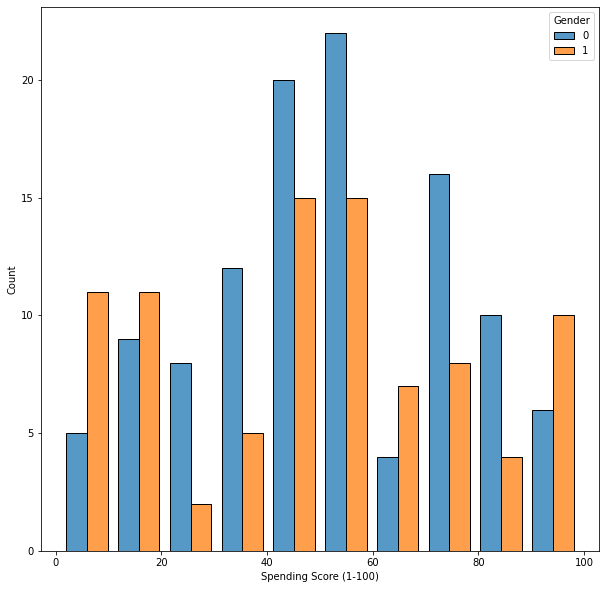

<Figure size 720x720 with 0 Axes>

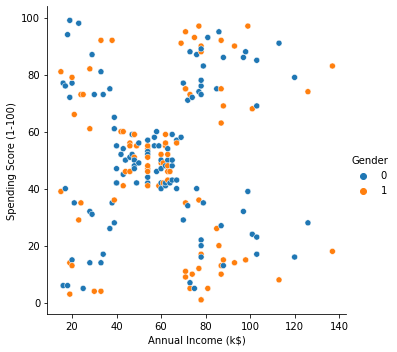

<Figure size 720x720 with 0 Axes>

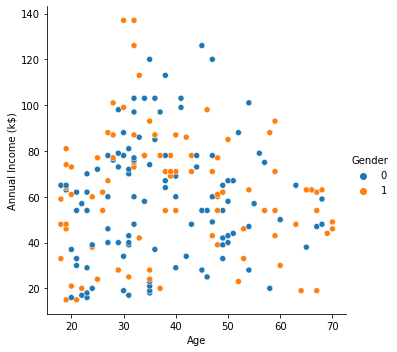

<Figure size 720x720 with 0 Axes>

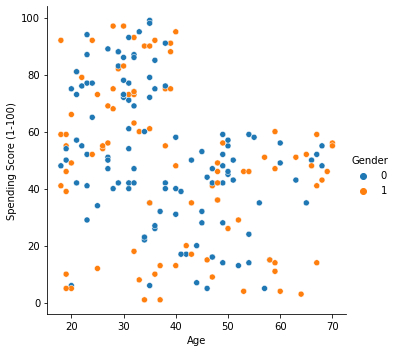

In [ ]:
print ('\n============================== (((((the heatmap of correlation between the features ))))) ============================')
plt.figure(figsize=(10,10));
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='RdBu');

sns.catplot(x="Gender" ,kind="count", data=df);

plt.figure(figsize=(10,10));
sns.histplot(data=df, x="Age", hue="Gender", bins=10, multiple="dodge", shrink=.8);

plt.figure(figsize=(10,10));
sns.histplot(data=df, x="Annual Income (k$)", hue="Gender", bins=10, multiple="dodge", shrink=.8);

plt.figure(figsize=(10,10));
sns.histplot(data=df, x="Spending Score (1-100)", hue="Gender", bins=10, multiple="dodge", shrink=.8);

plt.figure(figsize=(10,10));
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df);

plt.figure(figsize=(10,10));
sns.relplot(x="Age", y="Annual Income (k$)", hue="Gender", data=df);

plt.figure(figsize=(10,10));
sns.relplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df);


## Train the Model (Clustering)

================================================== [[ KMean Results ]] =================================================



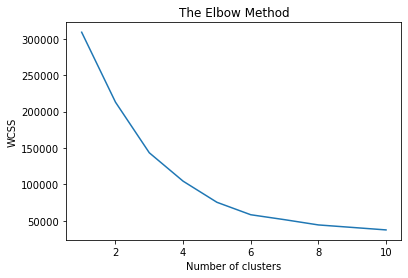

Labels :
[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

Cluster Centers :
[[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.51351351 40.32432432 87.43243243 18.18918919]
 [ 0.41772152 43.12658228 54.82278481 49.83544304]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]]


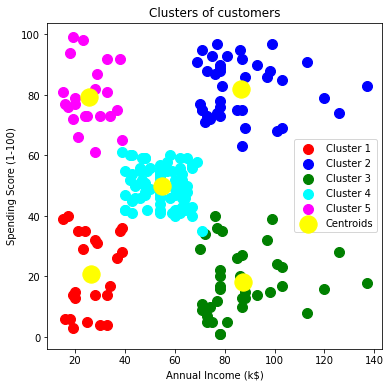

================================================= [[ DBSCAN Results ]] =================================================

Labels :
[-1  0  1  0 -1  0  1 -1  1  0  1 -1  1  0  1  0  2  0  2 -1  2  0  1  0
  1  0  2  2  2  0  1  0  1  0  1  0  1  0  2  0  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4 -1  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]

Number Of Outlier :  24

Number Of Clusters :  6

Cluster 0, Average Spending Score: 77.3125
Cluster 0, Average Annual Income: 25.0625

Cluster 1, Average Spending Score: 9.583333333333334
Cluster 1, Average Annual Income: 24.583333333333332

Cluster 2, Aver

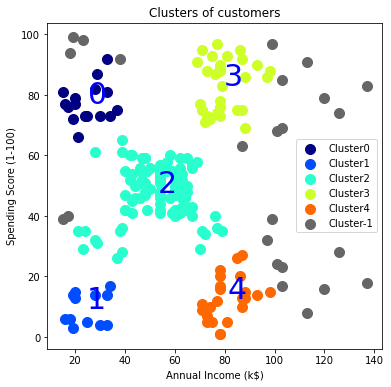

In [ ]:
print ('========================================================================================================================')
print ('================================================== [[ KMean Results ]] =================================================')
print ('========================================================================================================================\n')

X= df.iloc[:, 1:5].values

wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmean.fit(X)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print ('Labels :')
print (y_kmeans)

print ('\nCluster Centers :')
print(kmeans.cluster_centers_)

plt.figure(figsize=(6, 6))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 2], X[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print ('========================================================================================================================')
print ('================================================= [[ DBSCAN Results ]] =================================================')
print ('========================================================================================================================\n')

X = df.iloc[:, [3, 4]]
X_stnd = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.45, min_samples=9).fit(X_stnd)

labels = db.labels_
print ('Labels :')
print (labels)
X['Clus_Db']=labels

print('\nNumber Of Outlier : ',len(X[X['Clus_Db']==-1]))

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
print('\nNumber Of Clusters : ',clusterNum)

#Visualization1

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))
plt.figure(figsize=(6, 6))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = X[X.Clus_Db == clust_number]                    
    plt.scatter(clust_set['Annual Income (k$)'], clust_set['Spending Score (1-100)'], color =c,  marker='o', s= 100, label = 'Cluster' + str(clust_number))
    if clust_number != -1:
        cenx=np.mean(clust_set['Annual Income (k$)']) 
        ceny=np.mean(clust_set['Spending Score (1-100)']) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='blue',)
        print ("\nCluster "+str(clust_number)+', Average Spending Score: '+ str(np.mean(clust_set['Spending Score (1-100)'])))
        print ("Cluster "+str(clust_number)+', Average Annual Income: '+ str(np.mean(clust_set['Annual Income (k$)'])))
        
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

